<a href="https://colab.research.google.com/github/pritybisen17/AI/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Run command to use kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#download the Kaggle.json file  and we have to upload in google colab.
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:08<00:00, 85.2MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s] 


In [ ]:
#conver zipfile in to folder
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#import library
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators(image dataset from directory):which will divide images in to batches.store in data set object.
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize: we have to convert value from numy array 0 to 255 into 0 to 1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model:three layer model ,layer1 =32 filters,layer2 =64 filters , layer3 =128 filters

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#execute the model
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 108ms/step - loss: 1.0470 - accuracy: 0.6313 - val_loss: 0.6544 - val_accuracy: 0.6882
Epoch 2/10
625/625 [==============================] - 77s 122ms/step - loss: 0.5198 - accuracy: 0.7438 - val_loss: 0.5083 - val_accuracy: 0.7582
Epoch 3/10
625/625 [==============================] - 80s 127ms/step - loss: 0.4615 - accuracy: 0.7797 - val_loss: 0.5353 - val_accuracy: 0.7040
Epoch 4/10
625/625 [==============================] - 71s 113ms/step - loss: 0.3934 - accuracy: 0.8220 - val_loss: 0.4524 - val_accuracy: 0.8030
Epoch 5/10
625/625 [==============================] - 70s 112ms/step - loss: 0.3238 - accuracy: 0.8551 - val_loss: 0.4658 - val_accuracy: 0.8052
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2457 - accuracy: 0.8929 - val_loss: 0.7194 - val_accuracy: 0.7940
Epoch 7/10
625/625 [==============================] - 69s 111ms/step - loss: 0.1662 - accuracy: 0.9332 - val_loss: 0.7038 - val_ac

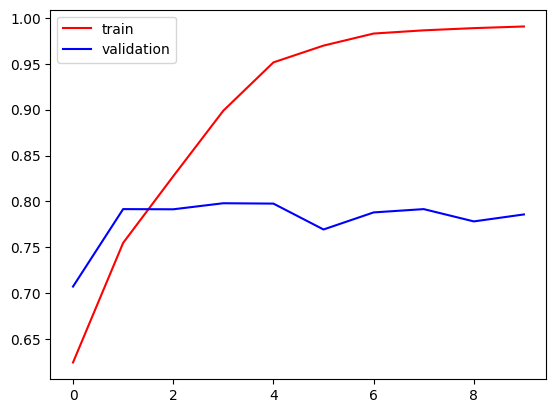

In [ ]:
#Plot the model for Accuracy between training and validation data before using BatchNormalization and dropout to reducing overfitting
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

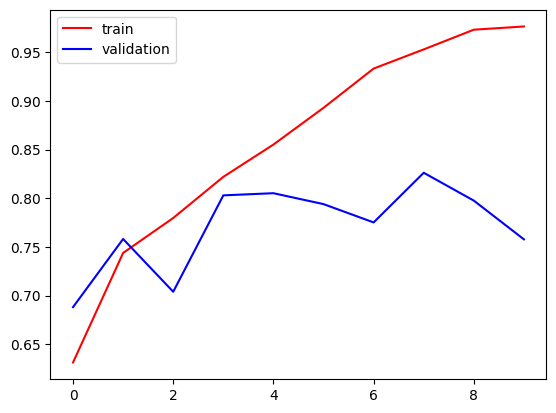

In [ ]:
#Plot the mode for Accuracy between training and validation data  after using BatchNormalization and dropout to reducing overfitting
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

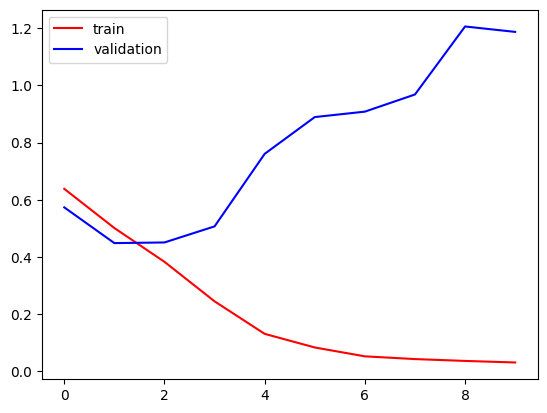

In [ ]:
#Plot the model for loss between training and validation data before using BatchNormalization and dropout to reducing overfitting
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

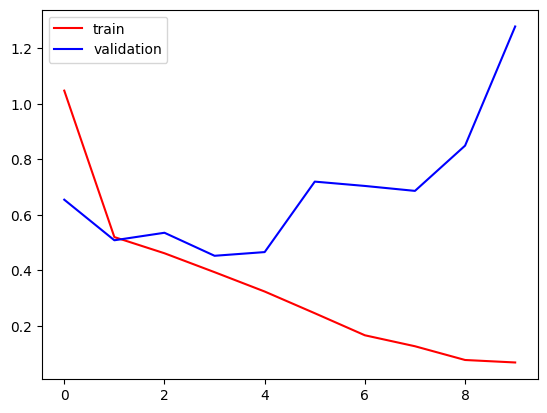

In [ ]:
#Plot the model for loss between training and validation data after using BatchNormalization and dropout reducing overfitting
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
test_img = plt.imread('/content/dog.10.jpg')

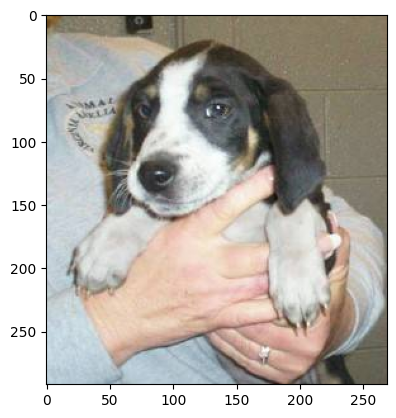

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(292, 269, 3)

In [ ]:
#resize the image in 256*256
test_img = cv2.resize(test_img,(256,256))

In [ ]:
#convert it in 4D tensor
test_input = test_img.reshape((1,256,256,3))

In [ ]:
#predicting the value
model.predict(test_input)

1/1 [==============================] - 0s 351ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img = plt.imread('/content/cat.9.jpg')

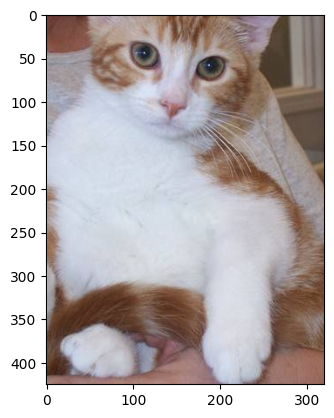

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(425, 320, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)